# Neural Networks for Data Science Applications
## Final Homework: Putting everything together

**Name**: *Caterina Alfano*

**Matricola**: *1746299*

Send the completed notebook before 15-01-2021 back to **simone.scardapane@uniroma1.it** with the object "[NNDS] Homework_2_\<id\>".

**Overview**: The homework is composed of four parts: (i) select a dataset; (ii) implement a custom component (ONLY if you did not submit the first homework); (iii) implement a neural network and train it on the dataset; (iv) perform a post-training operation on the method (interpretation / robustness / fairness).

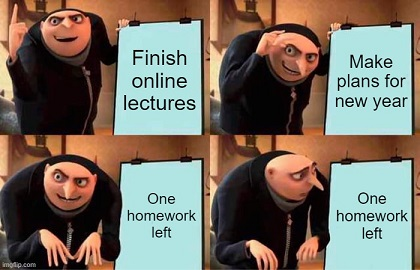

In [1]:
from matplotlib import pyplot as plt
import tensorflow as tf
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
pip install adversarial-robustness-toolbox

In [6]:
tf.compat.v1.disable_eager_execution()

**Important - before starting**: if you use any external material or inspiration for the code, reference it *explicitly* in the corresponding cell. For the textual descriptions, copy-paste *is not allowed*.

### Warm-up: Selecting a dataset

During the course, we were able to see only a small selection of datasets. For this homework, you are free to select any dataset that you believe interesting (images, audios, texts)... The task can be either classification or a more complex task (e.g., segmentation, sequence prediction, ...). *For tasks beyond classification, check carefully that the final exercise is viable before starting your implementation.*

A few repositories that you can look at:

1. The catalog of [TensorFlow Datasets](https://www.tensorflow.org/datasets/).
2. The [Kaggle catalog](https://www.kaggle.com/data). For downloading data from Kaggle on Google Colab, you will need to [load your Kaggle authentication token](https://colab.research.google.com/github/corrieann/kaggle/blob/master/kaggle_api_in_colab.ipynb).
3. The [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets.php).

You are not bound to these; any open repository is okay. As a rule of thumb, the choice of dataset will not influence the mark, so you can select a complexity that you believe adequate to your skills.

**DESCRIPTION OF THE CODE**: *Provide a small description of the dataset here (e.g., source, task, bibliographic reference if necessary...).*

In [ ]:
# I decided to use the mnist dataset, a large database of handwritten digits. 
# I am dowloading it through the art module 
# I am then taking 20% of the train dataset to use as validation set

In [5]:
from art.utils import load_dataset

(x_train, y_train), (x_test, y_test), min_, max_ = load_dataset(str("mnist"))
x_train, y_train = x_train[12000:], y_train[12000:]
x_test, y_test = x_test, y_test
x_val, y_val = x_train[:12000], y_train[:12000]

im_shape = x_train[0].shape

In [7]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(48000, 28, 28, 1)
(12000, 28, 28, 1)
(10000, 28, 28, 1)


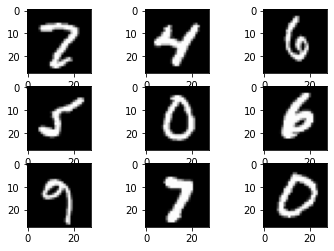

In [41]:
#Let's have a look at the dataset
for i in range(9):  
  plt.subplot(330 + 1 + i)
  im = x_train[i].reshape((28,28))
  plt.imshow(im, cmap=plt.get_cmap('gray'))
plt.show()

### Exercise 1: Implement a custom object (5 points)

**This exercise is required only for students that have not submitted the mid-term homework, or for students who want to raise their mid-term mark (mark <= 3/5). For a mark of 4/5, an additional point can also be recovered during the exam.**

**To recap**: if you submitted the mid-term homework, implement only Exercises 2 and 3, for a total of *10 points*. If you did not submit the mid-term homework, implement Exercises 1, 2, and 3 for a total of *15 points*. 

[Papers With Code](https://paperswithcode.com/methods) is a repository of state-of-the-art tasks and components for deep networks, including:

1. [Optimizers](https://paperswithcode.com/methods/category/optimization)
2. [Residual components](https://paperswithcode.com/methods/category/skip-connection-blocks)
3. [Attention mechanisms](https://paperswithcode.com/methods/category/attention-mechanisms)
4. [Regularizers](https://paperswithcode.com/methods/category/regularization)
5. [Activation functions](https://paperswithcode.com/methods/category/activation-functions)
6. [Normalization blocks](https://paperswithcode.com/methods/category/normalization)
7. [Loss functions](https://paperswithcode.com/methods/category/loss-functions)
8. [Variants of feedforward networks](https://paperswithcode.com/methods/category/feedforward-networks)

Select a component in the categories above **not covered during the course**, and provide a working implementation in **TensorFlow 2.x**. A re-implementation is preferable; if you use an open implementation, state it clearly below. If you re-use parts of an open implementation, also state it clearly below.

**DESCRIPTION OF THE CODE**: *provide a small description of the method you have implemented, with all necessary links. If needed, explain why it is useful for the task you have selected (e.g., if implementing a different loss function).*

In [ ]:
# Insert your custom component here
class MyCustomDropout(tf.keras.Layer):
  # ...

In [ ]:
# Optionally, briefly show how the component can be used

### Exercise 2: Train on your data (5 points)

This part is straightforward: create a model, according to everything we saw in the course, and train it on the data you have loaded. If you did Exercise 1, **include your custom component here**. Otherwise, you are free to use any components that were not included in the course (layers, losses, metrics, ...), provided you give a brief description below.

**DESCRIPTION OF THE CODE**: *Provide a small description of (i) the model, (ii) the task, (iii) any notable features of your training process.*

In [ ]:
# The goal is to correctly classify the 10 possibile digits. 
# The model is made of three repeated blocks made of:
# - a 2D convolution with L2 regularization
# - Relu activation
# - batch normalizazion
# - max pooling

# Finally a linear layer to create the output, with a softmax activation

# As optimizer I chose Adam and as Loss I chose the Categorical Cross Entropy

In [15]:
import keras
from keras import regularizers
from keras.models import Sequential
from tensorflow.keras import optimizers, losses
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Activation, BatchNormalization

weight_decay = 1e-4
opt = keras.optimizers.Adam(lr=0.0001)
criterion = losses.CategoricalCrossentropy(from_logits=False) 

In [ ]:
newmodel = Sequential()

newmodel.add(Conv2D(32, (3, 3), padding="same", kernel_regularizer=regularizers.l2(weight_decay), input_shape=x_train.shape[1:]))
newmodel.add(Activation("relu"))
newmodel.add(BatchNormalization())
newmodel.add(MaxPooling2D(pool_size=(2, 2)))

newmodel.add(Conv2D(64, (3, 3), padding="same", kernel_regularizer=regularizers.l2(weight_decay)))
newmodel.add(Activation("relu"))
newmodel.add(BatchNormalization())
newmodel.add(MaxPooling2D(pool_size=(2, 2)))

newmodel.add(Conv2D(128, (3, 3), padding="same", kernel_regularizer=regularizers.l2(weight_decay)))
newmodel.add(Activation("relu"))
newmodel.add(BatchNormalization())
newmodel.add(MaxPooling2D(pool_size=(2, 2)))

newmodel.add(Flatten())
newmodel.add(Dense(10))
newmodel.add(Activation("softmax"))

newmodel.compile(loss=criterion, optimizer=opt, metrics=['accuracy'])

In [ ]:
from art.estimators.classification import KerasClassifier

In [ ]:
# setting print of messages for the Art classifier
from __future__ import absolute_import, division, print_function, unicode_literals

import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)
handler = logging.StreamHandler()
formatter = logging.Formatter("[%(levelname)s] %(message)s")
handler.setFormatter(formatter)
logger.addHandler(handler)

In [ ]:
# I directly create the ART classifier, to avoid re-defining and re-training the model later
classifier = KerasClassifier(model=newmodel, clip_values=(0,255), use_logits=False)

[INFO] Inferred 15 hidden layers on Keras classifier.


In [ ]:
# Let's train the ART classifier
classifier.fit(x_train, y_train, batch_size=64, nb_epochs=5, validation_data=(x_val, y_val))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training_v1.py:1240: UserWarning: `model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`model.fit_generator` is deprecated and '


Epoch 1/5
750/750 [==============================] - ETA: 0s - batch: 374.5000 - size: 64.0000 - loss: 0.3901 - accuracy: 0.8829

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


750/750 [==============================] - 11s 12ms/step - batch: 374.5000 - size: 64.0000 - loss: 0.3901 - accuracy: 0.8829 - val_loss: 0.1309 - val_accuracy: 0.9663
Epoch 2/5
750/750 [==============================] - 8s 11ms/step - batch: 374.5000 - size: 64.0000 - loss: 0.1164 - accuracy: 0.9687 - val_loss: 0.0717 - val_accuracy: 0.9819
Epoch 3/5
750/750 [==============================] - 8s 11ms/step - batch: 374.5000 - size: 64.0000 - loss: 0.0796 - accuracy: 0.9800 - val_loss: 0.0586 - val_accuracy: 0.9853
Epoch 4/5
750/750 [==============================] - 8s 11ms/step - batch: 374.5000 - size: 64.0000 - loss: 0.0632 - accuracy: 0.9846 - val_loss: 0.0443 - val_accuracy: 0.9909
Epoch 5/5
750/750 [==============================] - 8s 11ms/step - batch: 374.5000 - size: 64.0000 - loss: 0.0528 - accuracy: 0.9875 - val_loss: 0.0400 - val_accuracy: 0.9911


In [ ]:
# Let's check the test accuracy
predictions = classifier.predict(x_test)
accuracy = np.sum(np.argmax(predictions, axis=1) == np.argmax(y_test, axis=1)) / len(y_test)
print("Accuracy on benign test examples: {}%".format(accuracy * 100))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


Accuracy on benign test examples: 98.72999999999999%


In [ ]:
newmodel.save("gdrive/MyDrive/NN_mnust14") 
#14 mnist: 99.1 val and 98.7

INFO:tensorflow:Assets written to: gdrive/MyDrive/NN_mnust14/assets


[INFO] Assets written to: gdrive/MyDrive/NN_mnust14/assets


### Exercise 3 (5 points)

Training a model is only the beginning! Select **one of the three** paths below, and follow the instructions.

1. **Interpreting your model**: interpretability is critical in many applications. Good libraries for obtaining interpetations from your model are [tf-explain](https://github.com/sicara/tf-explain), the original [LIME implementation](https://github.com/marcotcr/lime), and IBM [AIX360 Toolbox](https://github.com/Trusted-AI/AIX360). For this path, select an interpretability method, *read carefully the original paper*, and test it on one of your input examples. You can use one of the basic methods seen in the course, or a more advanced variant (e.g., Gradients*Input, Integrated Gradients, ...).

2. **Attacking your model**: there are a number of libraries for crafting an adversarial attack. Possible alternatives are [CleverHans](https://github.com/tensorflow/cleverhans), [Foolbox](https://github.com/bethgelab/foolbox), or the [Adversarial Robustness Toolbox](https://github.com/Trusted-AI/adversarial-robustness-toolbox). Select one white-box adversarial attack, *read carefully the original paper*, and create an adversarial attack on your network. You can use FGSM as seen in the course, or a more advanced method (e.g., JSMA, ...).

3. **Fairness**: finally, you might want to evaluate whether your model is fair. Good libraries for this are [FAT Forensics](https://fat-forensics.org/) or IBM [AIF360 Toolbox](https://github.com/Trusted-AI/AIF360). For this exercise, select a fairness metric, and evaluate the group fairness on your dataset. Then, apply a post-processing to enforce the fairness, and evaluate the eventual variation in accuracy.

In [22]:
#importing a model
from tensorflow import keras
model = keras.models.load_model("gdrive/MyDrive/NN_mnust14")
from art.estimators.classification import KerasClassifier
classifier = KerasClassifier(model=model, clip_values=(0,255), use_logits=False)

**DESCRIPTION OF THE CODE**: *Provide a description of the method and/or library you have chosen.*

In [ ]:
# I decided to use the Adversial Robustness Toolbox library to test my model's robustness against attacks.
# To attack the model I will try different ways of altering the test images and check
# if the model has still a good accuracy, or if the predictions are no longer reliable.

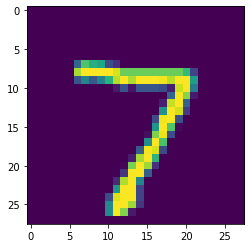

In [8]:
#This is an example of how the images are before the attacks
plt.imshow(x_test[0].reshape((28,28)))
plt.show()

 **Now we will simulate some attacks**

In [ ]:
# White box attacks' goal is to ensure misclassification. A white box attack
# is where the attacker has complete access to the model being attacked

In [ ]:
# Trying the Fast Gradient Method attack with different epsilons
# The fast gradient sign method works by using the gradients of the neural network to create an adversarial example.
# For an input image, the method uses the gradients of the loss with respect to the input image to create a new image
# that maximises the loss. This new image is called the adversarial image.

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


Eps value=0.1
Accuracy on adversarial samples: 72.50999999999999
Average perturbation: 0.06


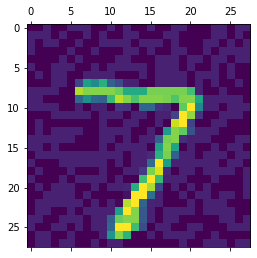

In [10]:
#FGSM with epsilon value of 0.1
from art.attacks.evasion import FastGradientMethod

attack = FastGradientMethod(estimator=classifier, eps=0.1)
x_test_advFGSM = attack.generate(x=x_test)
predictions = classifier.predict(x_test_advFGSM)
perturbation = np.mean(np.abs((x_test_advFGSM - x_test)))
print("Eps value=0.1")
acc2 = np.sum(np.argmax(predictions, axis=1) == np.argmax(y_test, axis=1)) / y_test.shape[0]

print("Accuracy on adversarial samples:",acc2 * 100 )
print('Average perturbation: {:4.2f}'.format(perturbation))
plt.matshow(x_test_advFGSM[0].reshape((28,28)))
plt.show()

Eps value=0.2
Accuracy on adversarial samples: 28.23
Average perturbation: 0.12


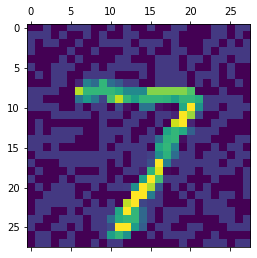

In [11]:
#FGSM with epsilon value of 0.2,

attack2 = FastGradientMethod(estimator=classifier, eps=0.2)
x_test_advFGSM2 = attack2.generate(x=x_test)
predictions = classifier.predict(x_test_advFGSM2)
perturbation = np.mean(np.abs((x_test_advFGSM2 - x_test)))
print("Eps value=0.2")
acc2 = np.sum(np.argmax(predictions, axis=1) == np.argmax(y_test, axis=1)) / y_test.shape[0]

print("Accuracy on adversarial samples:",acc2 * 100 )
print('Average perturbation: {:4.2f}'.format(perturbation))
plt.matshow(x_test_advFGSM2[0].reshape((28,28)))
plt.show()

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


Eps value=0.3
Accuracy on adversarial samples: 12.43
Average perturbation: 0.18


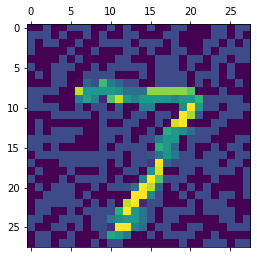

In [23]:
#FGSM with epsilon value of 0.3,

attack3 = FastGradientMethod(estimator=classifier, eps=0.3)
x_test_advFGSM3 = attack3.generate(x=x_test)
predictions = classifier.predict(x_test_advFGSM3)
perturbation = np.mean(np.abs((x_test_advFGSM3 - x_test)))
print("Eps value=0.3")
acc2 = np.sum(np.argmax(predictions, axis=1) == np.argmax(y_test, axis=1)) / y_test.shape[0]

print("Accuracy on adversarial samples:",acc2 * 100 )
print('Average perturbation: {:4.2f}'.format(perturbation))
plt.matshow(x_test_advFGSM3[0].reshape((28,28)))
plt.show()

In [ ]:
# One of the simplest methods to generate adversarial images is motivated by linearizing 
# the cost function and solving for the perturbation that maximizes the cost.
# The Basic Iterative Method extends this method by applying it multiple times with a
# small step size and clip pixel values of intermediate results after each step

In [ ]:
from art.attacks.evasion import UniversalPerturbation
attack4 = UniversalPerturbation(classifier = classifier, attacker="bim")
x_test_adv4 = attack4.generate(x=x_test)

Accuracy on adversarial samples: 10.100000000000001
Average perturbation: 2.21


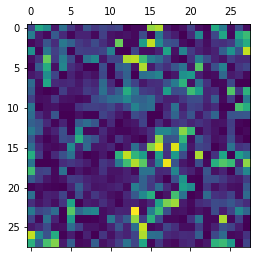

In [15]:
predictions = classifier.predict(x_test_adv4)
perturbation = np.mean(np.abs((x_test_adv4 - x_test)))
acc4 = np.sum(np.argmax(predictions, axis=1) == np.argmax(y_test, axis=1)) / y_test.shape[0]

print("Accuracy on adversarial samples:",acc4 * 100 )
print('Average perturbation: {:4.2f}'.format(perturbation))
plt.matshow(x_test_adv4[0].reshape((28,28)))
plt.show()

In [ ]:
# This image is so perturbated that it doesn't make any sense to us anymore
# I find it curious, however, that for the model is just slightly less meaningful 
# than the previous one, that was instead still understandable for humans

Training our model on perturbated data to make it more robust

In [ ]:
# Now that we found some weaknesses in our model we can
# train it also on the attacked data to make it more robust to future perturbations
# I chose to add to the train set the data from the FGSM attack with epsilon=0.2
# because it is a good comprimise between a too weak and too strong attack

In [12]:
# Creating adversarial train and val set
x_train_adv = attack2.generate(x=x_train)
x_val_adv = attack2.generate(x=x_val)

In [13]:
# Data augmentation: expand the training and val set with the adversarial samples
x_train_new = np.append(x_train, x_train_adv, axis=0)
y_train = np.append(y_train, y_train, axis=0)

x_val_new = np.append(x_val, x_val_adv, axis=0)
y_val = np.append(y_val, y_val, axis=0)

In [24]:
# Retrain the CNN on the extended dataset
model.compile(loss=criterion, optimizer=opt, metrics=["accuracy"])
classifier.fit(x_train_new, y_train, batch_size=64, nb_epochs=5, validation_data=(x_val_new, y_val))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training_v1.py:1240: UserWarning: `model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`model.fit_generator` is deprecated and '


Epoch 1/5
1499/1500 [============================>.] - ETA: 0s - batch: 749.0000 - size: 64.0000 - loss: 0.1420 - accuracy: 0.9579

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


1500/1500 [==============================] - 18s 12ms/step - batch: 749.5000 - size: 64.0000 - loss: 0.1419 - accuracy: 0.9579 - val_loss: 0.0631 - val_accuracy: 0.9838
Epoch 2/5
1500/1500 [==============================] - 17s 12ms/step - batch: 749.5000 - size: 64.0000 - loss: 0.0615 - accuracy: 0.9849 - val_loss: 0.0402 - val_accuracy: 0.9917
Epoch 3/5
1500/1500 [==============================] - 17s 12ms/step - batch: 749.5000 - size: 64.0000 - loss: 0.0474 - accuracy: 0.9895 - val_loss: 0.0337 - val_accuracy: 0.9935
Epoch 4/5
1500/1500 [==============================] - 17s 11ms/step - batch: 749.5000 - size: 64.0000 - loss: 0.0398 - accuracy: 0.9917 - val_loss: 0.0254 - val_accuracy: 0.9966
Epoch 5/5
1500/1500 [==============================] - 17s 11ms/step - batch: 749.5000 - size: 64.0000 - loss: 0.0323 - accuracy: 0.9941 - val_loss: 0.0238 - val_accuracy: 0.9966


In [25]:
# Evaluate the adversarially trained classifier on the test set
preds_fin = np.argmax(classifier.predict(x_test_advFGSM2), axis=1)
acc_fin = np.sum(preds_fin == np.argmax(y_test, axis=1)) / y_test.shape[0]

print("Accuracy on adversarial samples:",acc_fin * 100 )

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


Accuracy on adversarial samples: 98.89


In [26]:
# Let's see if it also improved in the other two scenarios
# epsilon = 0.1
preds_fin1 = np.argmax(classifier.predict(x_test_advFGSM), axis=1)
acc_fin1 = np.sum(preds_fin1 == np.argmax(y_test, axis=1)) / y_test.shape[0]

print("Accuracy on adversarial samples:",acc_fin1 * 100 )

Accuracy on adversarial samples: 99.11


In [27]:
# epsilon = 0.3
preds_fin3 = np.argmax(classifier.predict(x_test_advFGSM3), axis=1)
acc_fin3 = np.sum(preds_fin3 == np.argmax(y_test, axis=1)) / y_test.shape[0]

print("Accuracy on adversarial samples:",acc_fin3 * 100 )

Accuracy on adversarial samples: 98.1


In [ ]:
# Yes! Training it on the attack with epsilon=0.2 allowed us to gain a lot of rubstness

### Final checklist

1. Carefully check all textual descriptions and the code. Insert comments when needed.
2. Run everything one final time. *Please do not send me notebooks with errors or cells that are not working.*
3. Send the completed notebook before 15-01-2021 back to **simone.scardapane@uniroma1.it** with the object "[NNDS] Homework_2_\<id\>".

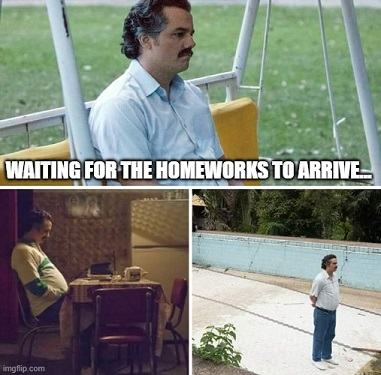

In [ ]:
# reference1: https://github.com/Trusted-AI/adversarial-robustness-toolbox
# reference2: https://keras.io/api/
# reference3: https://www.tensorflow.org/tutorials/generative/adversarial_fgsm
# reference4: https://arxiv.org/pdf/1607.02533.pdf
# reference5: https://adversarial-robustness-toolbox.readthedocs.io/en/stable/modules/attacks/evasion.html